In [3]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn 
import matplotlib.pyplot as plt


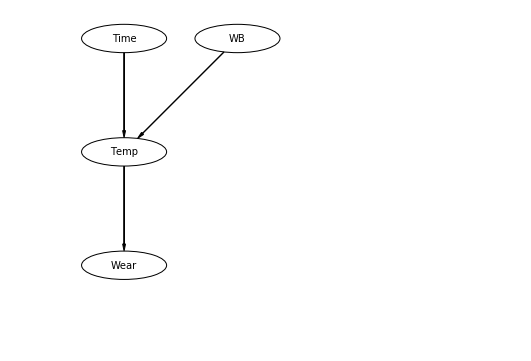

In [4]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Tme','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WB','WB',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Tme','Temp')
pgm.add_edge('WB','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();


In [5]:
df = pd.read_csv('C:/Users/DESUSAI/Desktop/New folder/Temp.csv',sep=';')
Maxlife = 100000
intialTime=20

In [6]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,5.0,5.000000,5.000000,5.000000,5.000000
mean,1.0,140.000000,172.800000,15.200000,3.000000
std,0.0,54.772256,15.205262,3.114482,1.581139
min,1.0,100.000000,166.000000,12.000000,1.000000
25%,1.0,100.000000,166.000000,13.000000,2.000000
50%,1.0,100.000000,166.000000,15.000000,3.000000
75%,1.0,200.000000,166.000000,16.000000,4.000000
max,1.0,200.000000,200.000000,20.000000,5.000000


In [7]:
temp_mean= df.Temp.mean()
temp_mean

140.0

In [8]:
df.skew()

Time           0.000000
Temp           0.608581
RunningTemp    2.236068
Wear           0.933451
Slot           0.000000
dtype: float64

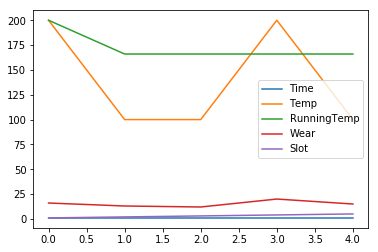

In [9]:
df.plot()
plt.show()

In [10]:
model = pm.Model();
with model:
    time = pm.Normal('time',intialTime)
    temp = pm.Normal('temp',mu=time)
    wear =pm.Normal('wear',mu=temp)
    trace = pm.sample(100000,tune=50000,progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [02:37<00:00, 955.00it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FED2278>,
      dtype=object)

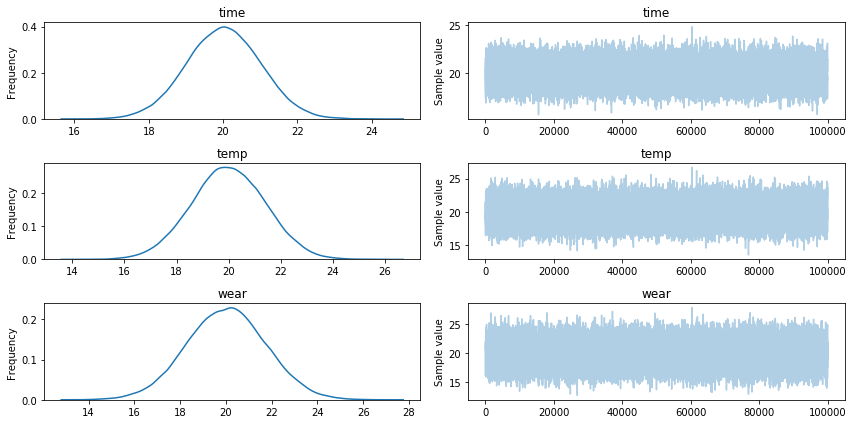

In [11]:
pm.traceplot(trace)

In [12]:
pm.summary(trace)


time:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  19.996           0.998            0.005            [18.023, 21.938]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  18.031         19.322         19.998         20.669         21.948


temp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  19.993           1.413            0.007            [17.272, 22.786]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  17.220         19.043         19.988         20.958         22.742


wear:

  Mean             SD               MC Error         95% HPD interval
  ----------------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010099550>,
      dtype=object)

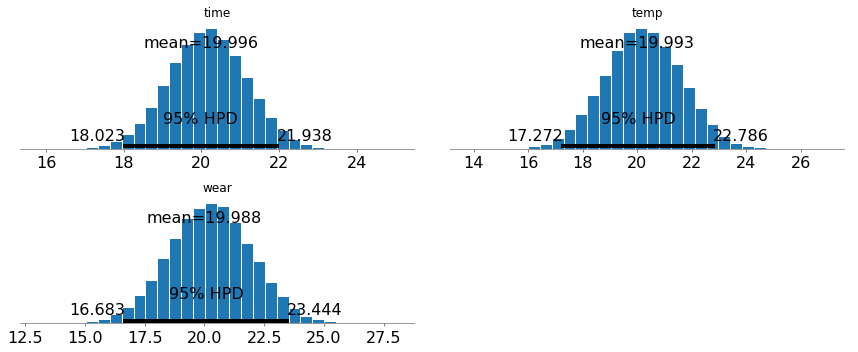

In [13]:
pm.plot_posterior(trace)

In [14]:
pred = pd.DataFrame({
    "Wear": trace["wear"][50000:],
    "Temp": trace["temp"][50000:],
    "Time": trace["time"][50000],
 
})


In [15]:
pred.Wear.mean()


19.98542538752952

In [16]:
pred.Temp.mean()
loopTime = pred.Time.mean()
loopWear = pred.Wear.mean()
loopTemp = pred.Temp.mean()

In [17]:
loopWear

19.98542538752952

In [18]:
loopTemp

19.990272153782534

In [19]:
loopTime

20.78907844147784

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:19<00:00, 757.47it/s]


1  sec 100 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|███████████████████████████████████| 15000/15000 [00:20<00:00, 731.54it/s]


1  sec 100 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|███████████████████████████████████| 15000/15000 [00:21<00:00, 711.52it/s]


1  sec 100 % life is left


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|███████████████████████████████████| 15000/15000 [00:19<00:00, 773.76it/s]


1  sec 100 % life is left


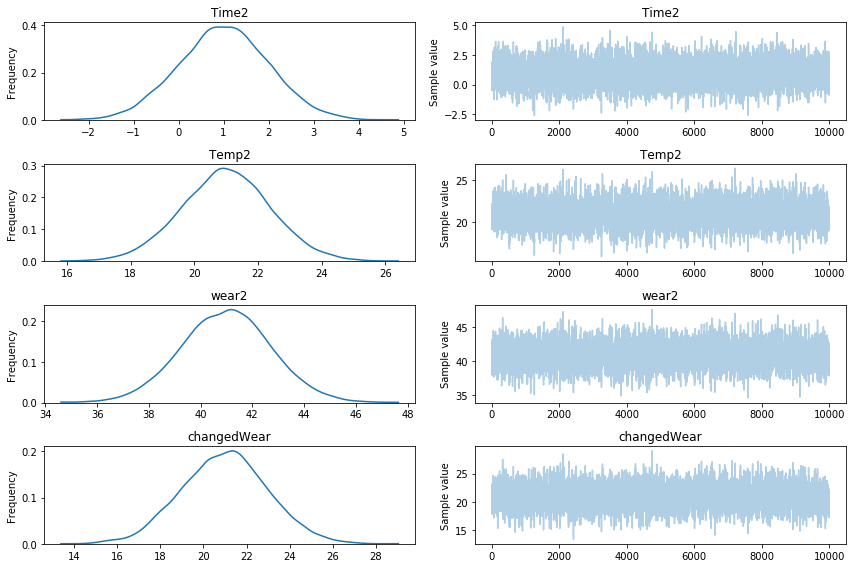

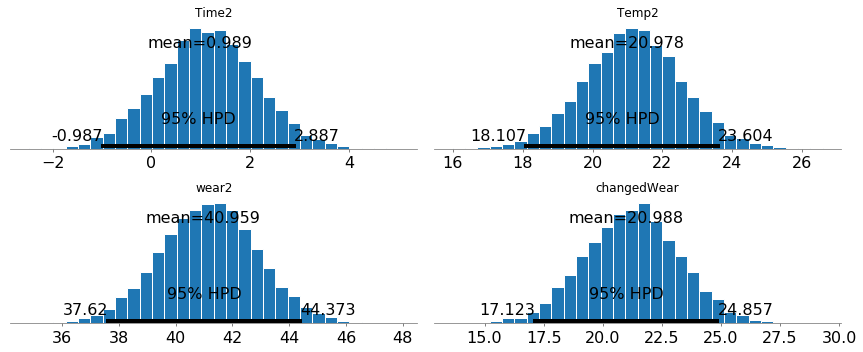

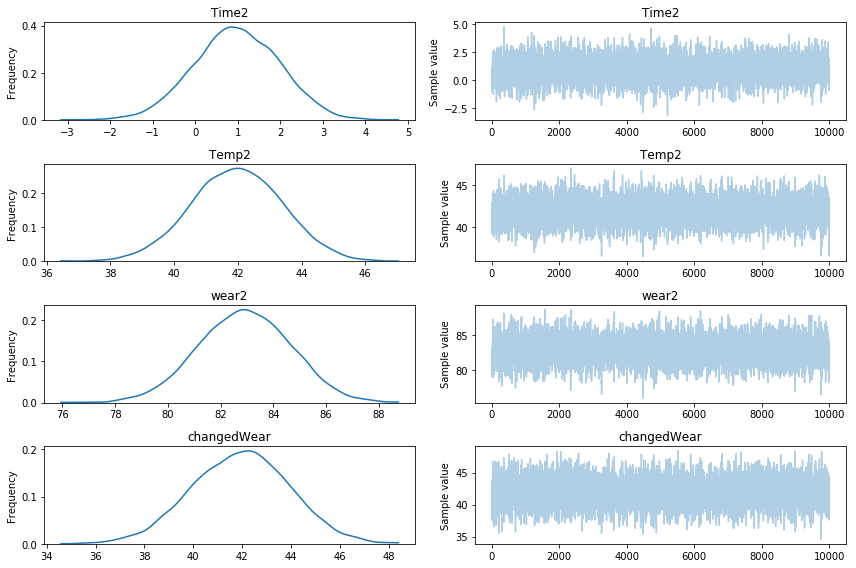

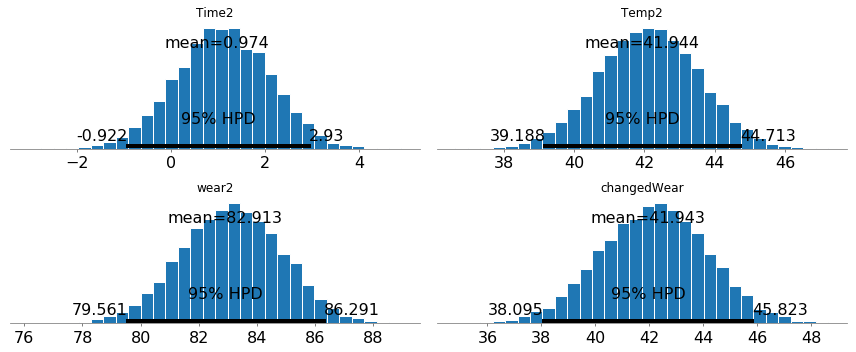

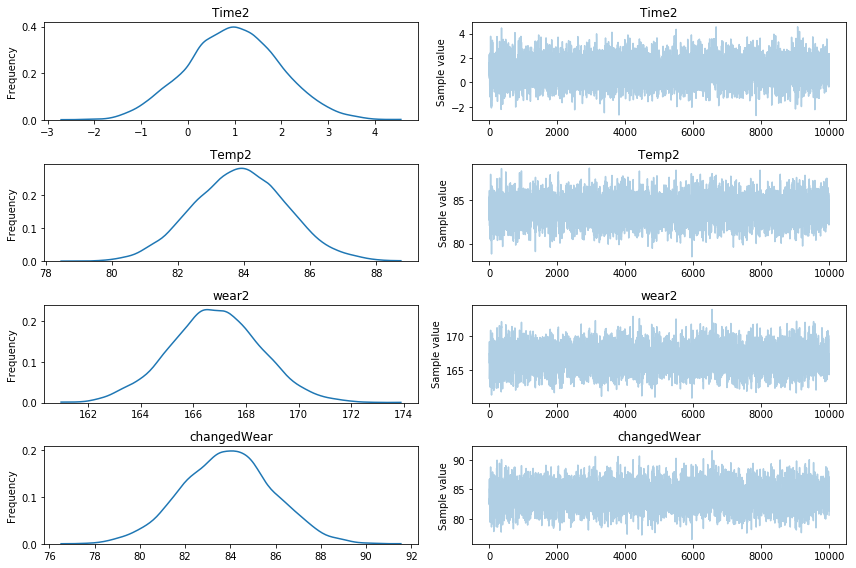

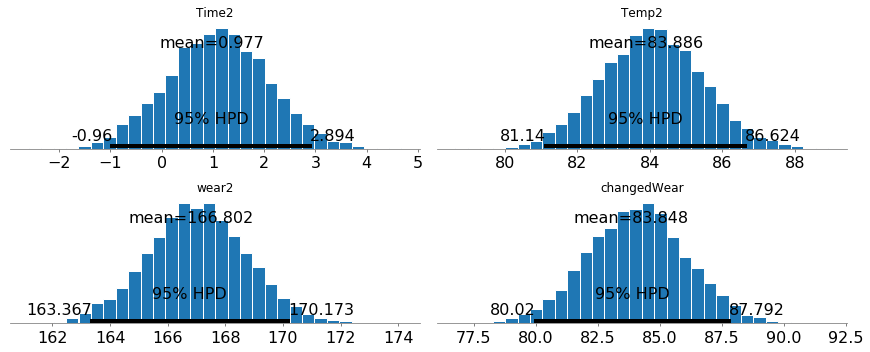

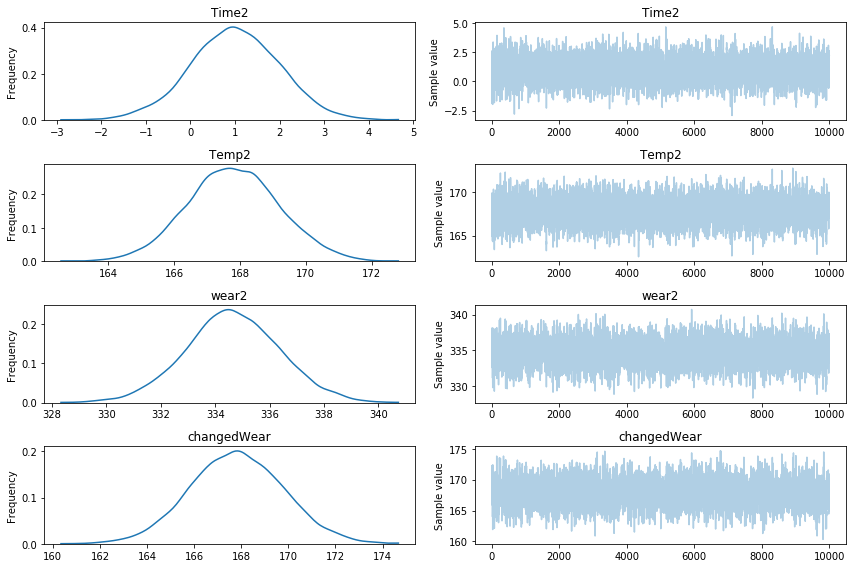

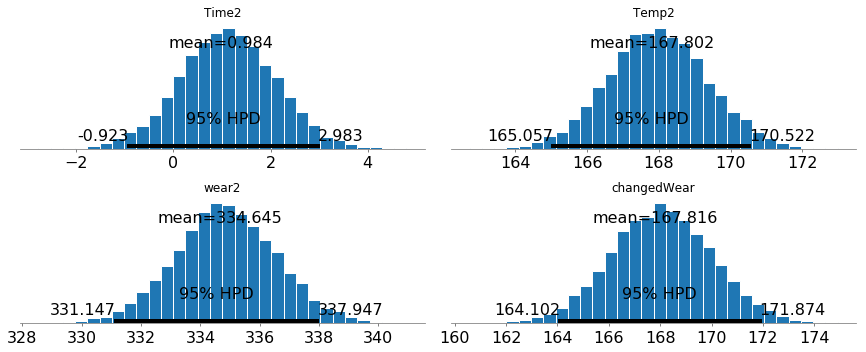

In [20]:
for i in range(0,len(df.Time)-1):    
    model2 = pm.Model();    
    with model2:        
        Time2 = pm.Normal('Time2',df.Time[i])
        Temp2 = pm.Normal('Temp2',mu=Time2+loopWear)
        wear2 = pm.Normal('wear2',mu=Temp2+loopWear)
        changedWear= pm.Normal('changedWear',mu=wear2-loopWear)
        trace2 = pm.sample(10000,tune=5000,progressbar=True)    
        globals()["predStep" + str(i)]= pd.DataFrame({
                    "Wear": trace2["wear2"][5000:],
                    "temp": trace2["Temp2"][5000:],
                    "time": trace2["Time2"][5000:],
                    "WearChanged": trace2["changedWear"][5000:]            
        })        
        globals()["predStep" + str(i)].to_csv('C:/Users/DESUSAI/Desktop/New folder/predStep_' + str(i+1)+'.csv', sep=';')
        sd=globals()["predStep" + str(i)]        
        loopTime = globals()["predStep" + str(i)].time.mean()
        loopWear = globals()["predStep" + str(i)].Wear.mean()        
        print(df.Time[i],' sec',round(((Maxlife-loopWear)/Maxlife)*100),'% life is left')        
        #seaborn.distplot(globals()["predStep" + str(i)].Wear)
        pm.traceplot(trace2)        
        pm.plot_posterior(trace2)
    
    
    

In [21]:
type(predStep0)

pandas.core.frame.DataFrame